<a href="https://colab.research.google.com/github/rifka1/MSIBOrbit/blob/main/Tugas_KNN_dan_Decision_Tree_(churnprediction)_Rifka_Fariyanti_1915031027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Tugas KNN dan Decision Tree**
Nama: Rifka Fariyanti

NPM: 1915031027

##**KNN**

Lakukan pemodelan KNN dengan k terbaik yang sudah terpilih, lakukan prediksi dan hitung akurasinya

###Memanggil Library

In [ ]:
# import libraries
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

###Load dataset

In [ ]:
df = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])
df.head()

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  Kartu A  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624  Kartu A  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  Kartu A  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5  Kartu A    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d  Kartu A  95296.67  76246.50      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0

In [ ]:
# Pada product, nilai atribut Kartu A didefinisikan sebagai 0, Kartu B didefinisikan sebagai 1, dan Kartu C didefinisikan sebagai 2
df['product'] = df['product'].map({'Kartu A': 0,'Kartu B': 1, 'Kartu C':2})
df['product'].value_counts()
df.head()

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422        0  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624        0  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0        0  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5        0    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d        0  95296.67  76246.50      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0

###Feature set

In [ ]:
df.keys()

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [ ]:
# atribut predictor
X = df[['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn']]

In [ ]:
# atribut target
Y = df['churn'].values

###Normalisasi data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))

###Pembagian data training dan testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8000, 14) (8000,)
Test set: (2000, 14) (2000,)


###Training

In [ ]:
k = 5
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier()

###Predicting

In [ ]:
yhat = knn.predict(X_test)
print(yhat)

[0 1 0 ... 1 0 0]


###Perhitungan akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy Data Training: ", metrics.accuracy_score(Y_train, knn.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(Y_test, yhat)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  0.999625
Test set Accuracy Data Test:  1.0


###Mencari nilai k terbaik

In [ ]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.    , 0.9995, 1.    , 1.    , 1.    , 1.    , 1.    , 0.9995,
       1.    , 0.9995, 0.9995])

###Plot visualisasi data

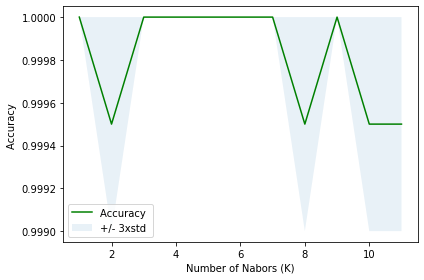

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


dari simulasi diketahui bahwa data dengan akurasi terbaik adalah dengan k = 4.

##**Melakukan Pemodelan KNN dengan nilai k terbaik**

###Training kembali dengan k = 1.

In [ ]:
k = 1
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(n_neighbors=1)

###Predicting

In [ ]:
yhat = knn.predict(X_test)
print(yhat)

[0 1 0 ... 1 0 0]


###Perhitungan akurasi

In [ ]:
from sklearn import metrics
print("Train set Accuracy Data Training: ", metrics.accuracy_score(Y_train, knn.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(Y_test, yhat)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  1.0
Test set Accuracy Data Test:  1.0


##**Decision Tree**

Lakukan Klasifikasi Customer Churn dengan Decision Tree:

buat model dan gambar pohonnya
Cari feature apa yang paling penting di kasus tersebut.
Hitung akurasinya, bandingkan dengan hasil di KNN, mana kah model yang lebih baik untuk kasus Customer churn?

###Memanggil library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

###Memanggil dataset

In [ ]:
df = pd.read_csv('http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv', index_col=['customer_id'])
df.head()

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  Kartu A  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624  Kartu A  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  Kartu A  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5  Kartu A    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d  Kartu A  95296.67  76246.50      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0

In [ ]:
# Pada product, nilai atribut Kartu A didefinisikan sebagai 0, Kartu B didefinisikan sebagai 1, dan Kartu C didefinisikan sebagai 2
df['product'] = df['product'].map({'Kartu A': 0,'Kartu B': 1, 'Kartu C':2})
df['product'].value_counts()
df.head()

product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422        0  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624        0  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0        0  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5        0    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d        0  95296.67  76246.50      0.0   

                                    music     games    chat_1    chat_2  \
customer_id                                                               
285fae8412c4720a0c79d95f98434422  33009.9  25669.97    1716.0    2145.0   
f45bce87ca6bf100f222fcc0db06b624      0.0      0.00       0.0   15444.0   
09b54557b1e2a10d998e3473a9ccd2a0      0.0      0.00   86795.5   94649.5   
11f252f48be36f93dd429f2ec86cb2f5      0.0      0.00       0.0       0.0   
a8df29ae9195eea348d2f74c967b978d      0.0  11000.00  118800.0  104940.0   

                                  socmed_1  socmed_2  internet  days_active  \
customer_id                                                                   
285fae8412c4720a0c79d95f98434422       0.0     792.0   11000.0           15   
f45bce87ca6bf100f222fcc0db06b624       0.0       0.0   74151.0           13   
09b54557b1e2a10d998e3473a9ccd2a0     330.0    1485.0   27467.0           15   
11f252f48be36f93dd429f2ec86cb2f5       0.0       0.0       0.0            2   
a8df29ae9195eea348d2f74c967b978d       0.0       0.0   63855.0           15   

                                  tenure  churn  
customer_id                                      
285fae8412c4720a0c79d95f98434422     776      0  
f45bce87ca6bf100f222fcc0db06b624     352      0  
09b54557b1e2a10d998e3473a9ccd2a0    1987      0  
11f252f48be36f93dd429f2ec86cb2f5     285      0  
a8df29ae9195eea348d2f74c967b978d    1081      0

In [ ]:
df.columns

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [ ]:
#split dataset in features and target variable

x = df.iloc[:, :13] # Features
y = df.iloc[:, 13] # Target variable

print(x,y)

                                  product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422        0  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624        0  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0        0  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5        0    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d        0  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c        1   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319        1  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc        1   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87        1  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d        2      0.00  11084.00      0.0   

                                    m

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Train set Accuracy Data Training: ", metrics.accuracy_score(y_train, clf.predict(X_train))) #Evaluasi apakah AI berhasil training dengan baik
print("Test set Accuracy Data Test: ", metrics.accuracy_score(y_test, y_pred)) #Evaluasi apakah AI berhasil memprediksi dengan benar/ mengukur kinerja model algoritma

Train set Accuracy Data Training:  0.99425
Test set Accuracy Data Test:  0.9345


In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churnprediction.png')
Image(graph.create_png())

In [ ]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()